# Load Full Data

In [1]:
import polars as pl
from pathlib import Path

def read_aggregated_files(base_path, symbol, interval, years):
    """
    Reads and concatenates aggregated trade data files for a given symbol, interval, and multiple years.

    Parameters:
    - base_path: The base directory where the data is stored.
    - symbol: The trading symbol (e.g., 'BTCUSDT').
    - interval: The aggregation interval (e.g., '15s', '20s', '25s', '30s').
    - years: A list of years to read data for (e.g., [2021, 2022, 2023, 2024]).

    Returns:
    - A concatenated Polars DataFrame containing all the data with consistent Float64 column types.
    """
    dfs = []
    data_dir = Path(base_path) / f"{symbol}_perps" / f"agg_{interval}"

    for year in years:
        files = [
            data_dir / f"{symbol}-aggTrades-{year}-{month:02d}_aggregated_{interval}.parquet"
            for month in range(1, 13)
        ]
        
        dfs.extend(
            pl.read_parquet(file).with_columns(
                [pl.col(col).cast(pl.Float64) for col in pl.read_parquet(file).columns]
            )
            for file in files if file.exists()
        )

    return pl.concat(dfs) if dfs else pl.DataFrame()

# Example usage
base_path = "/home/ubuntu/Rheza/data/binance_aggtrades"
symbol = "DOGEUSDT"
interval = "15s"  
years = [2023, 2024, 2025]

dfa = read_aggregated_files(base_path, symbol, interval, years)
dfa

year,month,day,hour,minute,interval,open,high,low,close
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023.0,1.0,1.0,0.0,0.0,0.0,0.07022,0.07024,0.07021,0.07023
2023.0,1.0,1.0,0.0,0.0,1.0,0.07024,0.07025,0.07023,0.07025
2023.0,1.0,1.0,0.0,0.0,2.0,0.07025,0.07026,0.07024,0.07026
2023.0,1.0,1.0,0.0,0.0,3.0,0.07026,0.0703,0.07025,0.0703
2023.0,1.0,1.0,0.0,1.0,0.0,0.0703,0.07032,0.0703,0.07031
…,…,…,…,…,…,…,…,…,…
2025.0,2.0,28.0,23.0,58.0,3.0,0.202,0.20201,0.20196,0.20196
2025.0,2.0,28.0,23.0,59.0,0.0,0.20195,0.20196,0.20191,0.20191
2025.0,2.0,28.0,23.0,59.0,1.0,0.2019,0.2019,0.20172,0.20172


In [2]:
# Example usage
base_path = "/home/ubuntu/Rheza/data/binance_aggtrades"
symbol = "BTCUSDT"
interval = "15s"  
years = [2023, 2024, 2025]

dfb = read_aggregated_files(base_path, symbol, interval, years)
dfb

year,month,day,hour,minute,interval,open,high,low,close
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023.0,1.0,1.0,0.0,0.0,0.0,16537.5,16537.6,16534.3,16534.3
2023.0,1.0,1.0,0.0,0.0,1.0,16534.3,16534.4,16534.3,16534.4
2023.0,1.0,1.0,0.0,0.0,2.0,16534.4,16534.4,16534.3,16534.3
2023.0,1.0,1.0,0.0,0.0,3.0,16534.3,16538.0,16534.3,16538.0
2023.0,1.0,1.0,0.0,1.0,0.0,16538.0,16538.0,16537.9,16538.0
…,…,…,…,…,…,…,…,…,…
2025.0,2.0,28.0,23.0,58.0,3.0,84362.6,84368.1,84362.5,84368.1
2025.0,2.0,28.0,23.0,59.0,0.0,84368.0,84375.6,84355.3,84355.3
2025.0,2.0,28.0,23.0,59.0,1.0,84355.4,84355.4,84326.2,84326.3


# Features Engineering

In [3]:
import polars as pl

# Compute percentage changes relative to 'open'
dfa_featured = dfa.with_columns([
    ((pl.col("close") - pl.col("open")) / pl.col("open") * 100).cast(pl.Float64).alias("occ"),
    ((pl.col("high") - pl.col("open")) / pl.col("open") * 100).cast(pl.Float64).alias("ohc"),
    ((pl.col("low") - pl.col("open")) / pl.col("open") * 100).cast(pl.Float64).alias("olc"),
    ((pl.col("close").shift(-1) - pl.col("open")) / pl.col("open") * 100).cast(pl.Float64).alias("occ_2"),
    ((pl.col("high").shift(-1) - pl.col("open")) / pl.col("open") * 100).cast(pl.Float64).alias("ohc_2"),
    ((pl.col("low").shift(-1) - pl.col("open")) / pl.col("open") * 100).cast(pl.Float64).alias("olc_2")
])

# Define shift values (now positive)
shifts = [2, 3, 4, 5, 6, 7, 8]

# Compute shifted values and derived features
dfa_featured = dfa_featured.with_columns([
    pl.col("occ").shift(-1).cast(pl.Float64).alias("next_occ"),
    pl.col("open").shift(-1).cast(pl.Float64).alias("next_open"),
    pl.col("close").shift(-1).cast(pl.Float64).alias("next_close"),
] + [
    pl.col("close").shift(-s).cast(pl.Float64).alias(f"next_close_{s}") for s in shifts
]
)

# Compute rolling mean and rolling standard deviation
dfa_featured = dfa_featured.with_columns([
    pl.col("close").rolling_mean(window_size=120).alias("rolling_mean"),
    pl.col("close").rolling_std(window_size=120).alias("rolling_std"),
])

# Compute the rolling Z-score
dfa_featured = dfa_featured.with_columns(
    ((pl.col("close") - pl.col("rolling_mean")) / pl.col("rolling_std")).alias("rolling_zscore")
)

# Remove nulls and return cleaned dataframe
dfa_featured = dfa_featured.drop_nulls()
dfa_featured

year,month,day,hour,minute,interval,open,high,low,close,occ,ohc,olc,occ_2,ohc_2,olc_2,next_occ,next_open,next_close,next_close_2,next_close_3,next_close_4,next_close_5,next_close_6,next_close_7,next_close_8,rolling_mean,rolling_std,rolling_zscore
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023.0,1.0,1.0,0.0,29.0,3.0,0.06997,0.07,0.06997,0.07,0.042876,0.042876,0.0,0.057167,0.057167,0.028584,0.028576,0.06999,0.07001,0.06996,0.06996,0.06994,0.06993,0.06992,0.06991,0.06991,0.069981,0.000156,0.120402
2023.0,1.0,1.0,0.0,30.0,0.0,0.06999,0.07001,0.06999,0.07001,0.028576,0.028576,0.0,-0.042863,0.028576,-0.042863,-0.071418,0.07001,0.06996,0.06996,0.06994,0.06993,0.06992,0.06991,0.06991,0.06991,0.069979,0.000155,0.198156
2023.0,1.0,1.0,0.0,30.0,1.0,0.07001,0.07001,0.06996,0.06996,-0.071418,0.0,-0.071418,-0.071418,-0.057135,-0.085702,0.0,0.06996,0.06996,0.06994,0.06993,0.06992,0.06991,0.06991,0.06991,0.06987,0.069977,0.000153,-0.110748
2023.0,1.0,1.0,0.0,30.0,2.0,0.06996,0.06997,0.06995,0.06996,0.0,0.014294,-0.014294,-0.028588,0.0,-0.028588,-0.028588,0.06996,0.06994,0.06993,0.06992,0.06991,0.06991,0.06991,0.06987,0.06985,0.069974,0.000151,-0.095782
2023.0,1.0,1.0,0.0,30.0,3.0,0.06996,0.06996,0.06994,0.06994,-0.028588,0.0,-0.028588,-0.042882,-0.014294,-0.042882,-0.028592,0.06995,0.06993,0.06992,0.06991,0.06991,0.06991,0.06987,0.06985,0.06985,0.069971,0.000148,-0.212951
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025.0,2.0,28.0,23.0,56.0,3.0,0.20193,0.20198,0.20193,0.20197,0.019809,0.024761,0.0,-0.014857,0.014857,-0.019809,-0.029709,0.20196,0.2019,0.20189,0.20189,0.20186,0.20198,0.20206,0.20201,0.20196,0.201746,0.000235,0.956422
2025.0,2.0,28.0,23.0,57.0,0.0,0.20196,0.20196,0.20189,0.2019,-0.029709,0.0,-0.03466,-0.03466,0.009903,-0.039612,-0.009905,0.20191,0.20189,0.20189,0.20186,0.20198,0.20206,0.20201,0.20196,0.20191,0.201753,0.000226,0.651895
2025.0,2.0,28.0,23.0,57.0,1.0,0.20191,0.20198,0.20188,0.20189,-0.009905,0.034669,-0.014858,-0.009905,-0.004953,-0.034669,0.0,0.20189,0.20189,0.20186,0.20198,0.20206,0.20201,0.20196,0.20191,0.20172,0.20176,0.000216,0.602539


In [4]:
import polars as pl

# Compute rolling mean and rolling standard deviation
dfb_featured = dfb.with_columns([
    pl.col("close").rolling_mean(window_size=120).alias("rolling_mean"),
    pl.col("close").rolling_std(window_size=120).alias("rolling_std"),
])

# Compute the rolling Z-score
dfb_featured = dfb_featured.with_columns(
    ((pl.col("close") - pl.col("rolling_mean")) / pl.col("rolling_std")).alias("rolling_zscore_btc")
)

dfb_featured = dfb_featured.with_columns(
        pl.when(pl.col("close").cast(float) >= pl.col("open").cast(float))
        .then(1)
        .otherwise(0)
        .alias("bull_btc")
    )

dfb_featured = dfb_featured.drop_nulls()
dfb_featured = dfb_featured.drop(["open", "high","low","close","rolling_mean","rolling_std"])  # Drop multiple columns
# Display result
dfb_featured

year,month,day,hour,minute,interval,rolling_zscore_btc,bull_btc
f64,f64,f64,f64,f64,f64,f64,i32
2023.0,1.0,1.0,0.0,29.0,3.0,1.394121,1
2023.0,1.0,1.0,0.0,30.0,0.0,1.380384,1
2023.0,1.0,1.0,0.0,30.0,1.0,1.03679,0
2023.0,1.0,1.0,0.0,30.0,2.0,0.557836,0
2023.0,1.0,1.0,0.0,30.0,3.0,0.565815,1
…,…,…,…,…,…,…,…
2025.0,2.0,28.0,23.0,58.0,3.0,0.551456,1
2025.0,2.0,28.0,23.0,59.0,0.0,0.439718,0
2025.0,2.0,28.0,23.0,59.0,1.0,0.201392,0


# Combine Data

In [5]:
dfs_featured = dfa_featured.join(dfb_featured, on=["year", "month", "day", "hour", "minute", "interval"], how="inner")
dfs_featured

year,month,day,hour,minute,interval,open,high,low,close,occ,ohc,olc,occ_2,ohc_2,olc_2,next_occ,next_open,next_close,next_close_2,next_close_3,next_close_4,next_close_5,next_close_6,next_close_7,next_close_8,rolling_mean,rolling_std,rolling_zscore,rolling_zscore_btc,bull_btc
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32
2023.0,1.0,1.0,0.0,29.0,3.0,0.06997,0.07,0.06997,0.07,0.042876,0.042876,0.0,0.057167,0.057167,0.028584,0.028576,0.06999,0.07001,0.06996,0.06996,0.06994,0.06993,0.06992,0.06991,0.06991,0.069981,0.000156,0.120402,1.394121,1
2023.0,1.0,1.0,0.0,30.0,0.0,0.06999,0.07001,0.06999,0.07001,0.028576,0.028576,0.0,-0.042863,0.028576,-0.042863,-0.071418,0.07001,0.06996,0.06996,0.06994,0.06993,0.06992,0.06991,0.06991,0.06991,0.069979,0.000155,0.198156,1.380384,1
2023.0,1.0,1.0,0.0,30.0,1.0,0.07001,0.07001,0.06996,0.06996,-0.071418,0.0,-0.071418,-0.071418,-0.057135,-0.085702,0.0,0.06996,0.06996,0.06994,0.06993,0.06992,0.06991,0.06991,0.06991,0.06987,0.069977,0.000153,-0.110748,1.03679,0
2023.0,1.0,1.0,0.0,30.0,2.0,0.06996,0.06997,0.06995,0.06996,0.0,0.014294,-0.014294,-0.028588,0.0,-0.028588,-0.028588,0.06996,0.06994,0.06993,0.06992,0.06991,0.06991,0.06991,0.06987,0.06985,0.069974,0.000151,-0.095782,0.557836,0
2023.0,1.0,1.0,0.0,30.0,3.0,0.06996,0.06996,0.06994,0.06994,-0.028588,0.0,-0.028588,-0.042882,-0.014294,-0.042882,-0.028592,0.06995,0.06993,0.06992,0.06991,0.06991,0.06991,0.06987,0.06985,0.06985,0.069971,0.000148,-0.212951,0.565815,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025.0,2.0,28.0,23.0,56.0,3.0,0.20193,0.20198,0.20193,0.20197,0.019809,0.024761,0.0,-0.014857,0.014857,-0.019809,-0.029709,0.20196,0.2019,0.20189,0.20189,0.20186,0.20198,0.20206,0.20201,0.20196,0.201746,0.000235,0.956422,0.774493,0
2025.0,2.0,28.0,23.0,57.0,0.0,0.20196,0.20196,0.20189,0.2019,-0.029709,0.0,-0.03466,-0.03466,0.009903,-0.039612,-0.009905,0.20191,0.20189,0.20189,0.20186,0.20198,0.20206,0.20201,0.20196,0.20191,0.201753,0.000226,0.651895,0.647265,0
2025.0,2.0,28.0,23.0,57.0,1.0,0.20191,0.20198,0.20188,0.20189,-0.009905,0.034669,-0.014858,-0.009905,-0.004953,-0.034669,0.0,0.20189,0.20189,0.20186,0.20198,0.20206,0.20201,0.20196,0.20191,0.20172,0.20176,0.000216,0.602539,0.455993,0


# Checking Matched Criteria

In [6]:
import polars as pl
import itertools
import numpy as np

# Define possible threshold values for each parameter
occ_thresholds = [0.4]
ohc_thresholds = [0.4]
olc_thresholds = [-100]
rolling_zscore_btc_thresholds = [-1]
change_thresholds = [100]
hold_periodes = [2]

# Store results
results = []

# Loop through all combinations of thresholds
for (occ_threshold, ohc_threshold, olc_threshold, change_threshold, hold_periode, rolling_zscore_btc_threshold) in itertools.product(
    occ_thresholds, ohc_thresholds, olc_thresholds, change_thresholds, hold_periodes, rolling_zscore_btc_thresholds):

    # Apply filtering logic
    df_test = dfs_featured.with_columns(
        pl.when(
                (pl.col("occ").cast(float) >= occ_threshold) &
                (pl.col("ohc").cast(float) >= ohc_threshold) &
                (pl.col("olc").cast(float) >= olc_threshold) &
                (pl.col("rolling_zscore_btc").cast(float) <= rolling_zscore_btc_threshold) &
                (pl.col("bull_btc") == 1) 
        )
        .then(pl.lit("Long"))
        .otherwise(None)
        .alias("action")
    )

    # Define the target columns dynamically
    target_close = f"next_close_{hold_periode}" if hold_periode > 1 else "next_close"

    ##
    # Drop any NaN values **only in df_test_cleaned**
    df_test_cleaned = df_test.drop_nulls()

    # Convert year, month, day, hour, and minute to a datetime column
    df_test_cleaned = df_test_cleaned.with_columns(
        (pl.col("year").cast(pl.Int32).cast(pl.Utf8) + "-" + 
        pl.col("month").cast(pl.Int32).cast(pl.Utf8).str.zfill(2) + "-" + 
        pl.col("day").cast(pl.Int32).cast(pl.Utf8).str.zfill(2) + " " + 
        pl.col("hour").cast(pl.Int32).cast(pl.Utf8).str.zfill(2) + ":" + 
        pl.col("minute").cast(pl.Int32).cast(pl.Utf8).str.zfill(2))
        .str.strptime(pl.Datetime, "%Y-%m-%d %H:%M", strict=False)
        .alias("datetime")
    )

    # Add interval (each interval is 15 seconds in milliseconds)
    df_test_cleaned = df_test_cleaned.with_columns(
        (pl.col("datetime") + (pl.col("interval") * 15_000).cast(pl.Duration("ms"))).alias("datetime")
    )

    # Add interval (each interval is 15 seconds in milliseconds)
    df_test_cleaned = df_test_cleaned.with_columns(
    (pl.col("datetime") + pl.duration(milliseconds=15_000 * hold_periode)).alias("estimated_closetime")
    )

    # Select relevant columns
    df_test_cleaned = df_test_cleaned.select(["action", "datetime", "year", "month", "day", "hour", "minute",
                                            "occ", "ohc", "olc", "next_open", "estimated_closetime", target_close])

    # Rename the last column to 'target_price'
    df_test_cleaned = df_test_cleaned.rename({df_test_cleaned.columns[-1]: "target_price"})

    # Ensure DataFrame is sorted
    df_test_cleaned = df_test_cleaned.sort("datetime")

    # Convert to list of dictionaries for iterative processing
    df_list = df_test_cleaned.to_dicts()
    merged_list = []

    i = 0
    while i < len(df_list):
        current_row = df_list[i]
        
        # Check if the next row exists
        while i + 1 < len(df_list) and df_list[i + 1]["datetime"] < current_row["estimated_closetime"]:
            next_row = df_list[i + 1]
            
            # Merge logic: Keep all values from the current row except estimated_closetime and target_price
            current_row["estimated_closetime"] = next_row["estimated_closetime"]
            current_row["target_price"] = next_row["target_price"]
            
            # Move to the next row (merging step)
            i += 1

        # Append the merged row
        merged_list.append(current_row)
        i += 1  # Move to the next unmerged row

    # Convert back to Polars DataFrame
    df_merged = pl.DataFrame(merged_list)

    df_sum = df_merged.with_columns(
    pl.when(pl.col("action") == "Long")
    .then(
        pl.when(((pl.col("target_price") - pl.col("next_open")) / pl.col("next_open") * 100) >= change_threshold)
        .then(pl.lit(change_threshold - 0.04))
        .otherwise(((pl.col("target_price") - pl.col("next_open")) / pl.col("next_open") * 100) - 0.1))
    .alias("pnl")
    )

    df_monthly = df_sum.select(["datetime", "year", "month", "day", "hour", "minute", "action", "pnl"])
    df_monthly = df_monthly.with_columns(
            pl.when(
                (pl.col("pnl") >= 0)
            )
            .then(1)
            .otherwise(0)
            .alias("win")
        )

    # Group by year and month, then aggregate
    df_monthly = df_monthly.group_by(['year', 'month']).agg([
        pl.col('action').count().alias('action_count'),
        pl.col('pnl').sum().alias('cum_pnl'),
        pl.col('win').sum().alias('sum_win'),
    ])

    # Calculate metrics
    total_pnl = df_sum["pnl"].sum()
    std_pnl = df_monthly["cum_pnl"].std()
    total_long = len(df_sum)
    total_wins = df_sum.filter((pl.col("pnl") >= 0)).height
    win_rate = (total_wins / total_long) * 100 if total_long > 0 else 0

print(f"Metrics | occ: {occ_thresholds}, ohc: {ohc_thresholds}, hold: {hold_periode}, btc_z-score: {rolling_zscore_btc_threshold}")
print(f"Long Opened: {total_long}")
print(f"Winrate: {win_rate:.2f} %")
print(f"Total PnL: {total_pnl:.2f} % | std: {std_pnl}")

Metrics | occ: [0.4], ohc: [0.4], hold: 2, btc_z-score: -1
Long Opened: 1584
Winrate: 41.79 %
Total PnL: -72.18 % | std: 8.64125252552028


# Trade Summary

In [81]:
df_sum = df_sum.select(["datetime", "year", "month", "day", "hour", "minute", "action", "pnl"])
df_sum = df_sum.with_columns(
        pl.when(
            (pl.col("pnl") >= 0)
        )
        .then(1)
        .otherwise(0)
        .alias("win")
    )
df_sum

datetime,year,month,day,hour,minute,action,pnl,win
datetime[μs],f64,f64,f64,f64,f64,str,f64,i32
2023-01-14 09:22:00,2023.0,1.0,14.0,9.0,22.0,"""Long""",1.58566,1
2023-01-18 16:22:15,2023.0,1.0,18.0,16.0,22.0,"""Long""",1.82089,1
2023-01-21 10:26:45,2023.0,1.0,21.0,10.0,26.0,"""Long""",0.121162,1
2023-03-03 01:32:30,2023.0,3.0,3.0,1.0,32.0,"""Long""",1.743255,1
2023-04-03 20:55:45,2023.0,4.0,3.0,20.0,55.0,"""Long""",-0.176461,0
…,…,…,…,…,…,…,…,…
2025-01-20 17:40:00,2025.0,1.0,20.0,17.0,40.0,"""Long""",-1.626632,0
2025-01-21 14:40:45,2025.0,1.0,21.0,14.0,40.0,"""Long""",0.078581,1
2025-02-03 01:49:30,2025.0,2.0,3.0,1.0,49.0,"""Long""",0.042594,1


In [82]:
import polars as pl

# Compute cumulative PnL
df_cum = df_sum.with_columns(
    pl.col("pnl").cum_sum().alias("cum_pnl")  # Ensure `cum_sum()` is used
)

# Compute the running maximum of cumulative PnL
df_cum = df_cum.with_columns(
    pl.col("cum_pnl").cum_max().alias("max_cum_pnl")  # Ensure `cum_max()` is used
)

# Compute drawdown (difference between current and max cumulative PnL)
df_cum = df_cum.with_columns(
    (pl.col("cum_pnl") - pl.col("max_cum_pnl")).alias("drawdown")
)

# Find the most negative drawdown
max_negative_cum_pnl = df_cum.select(pl.col("drawdown").min()).item()

# Display result
print(f"Most negative cumulative PnL (Max Drawdown): {max_negative_cum_pnl}")

Most negative cumulative PnL (Max Drawdown): -4.350627240630551


In [83]:
import polars as pl

# Group by year and month, then aggregate
df_monthly = df_sum.group_by(['year', 'month']).agg([
    pl.col('action').count().alias('action_count'),
    pl.col('pnl').sum().alias('cum_pnl'),
    pl.col('win').sum().alias('sum_win'),
])

df_monthly = df_monthly.with_columns(
        ((pl.col("sum_win") / pl.col("action_count")) * 100).alias("win_rate")
    )

# Display the result
df_monthly

year,month,action_count,cum_pnl,sum_win,win_rate
f64,f64,u32,f64,i32,f64
2025.0,1.0,2,-1.548051,1,50.0
2024.0,4.0,12,9.329154,9,75.0
2024.0,3.0,13,14.668794,10,76.923077
2025.0,2.0,3,10.020766,3,100.0
2024.0,11.0,11,13.002393,10,90.909091
…,…,…,…,…,…
2023.0,4.0,2,0.724004,1,50.0
2023.0,10.0,3,1.940892,2,66.666667
2023.0,5.0,1,-0.138645,0,0.0


In [84]:
import polars as pl

# Group by year and month, then aggregate
df_hourly = df_sum.group_by(['hour']).agg([
    pl.col('action').count().alias('action_count'),
    pl.col('pnl').sum().alias('cum_pnl'),
    pl.col('win').sum().alias('sum_win'),
])

df_hourly = df_hourly.with_columns(
        ((pl.col("sum_win") / pl.col("action_count")) * 100).alias("win_rate")
    )

# Display the result
df_hourly

hour,action_count,cum_pnl,sum_win,win_rate
f64,u32,f64,i32,f64
16.0,7,12.089398,6,85.714286
10.0,5,4.666719,4,80.0
19.0,6,1.242785,3,50.0
22.0,1,2.98425,1,100.0
12.0,6,8.205639,5,83.333333
…,…,…,…,…
11.0,2,1.037383,1,50.0
15.0,2,2.968665,2,100.0
3.0,2,2.626667,2,100.0


# Plot

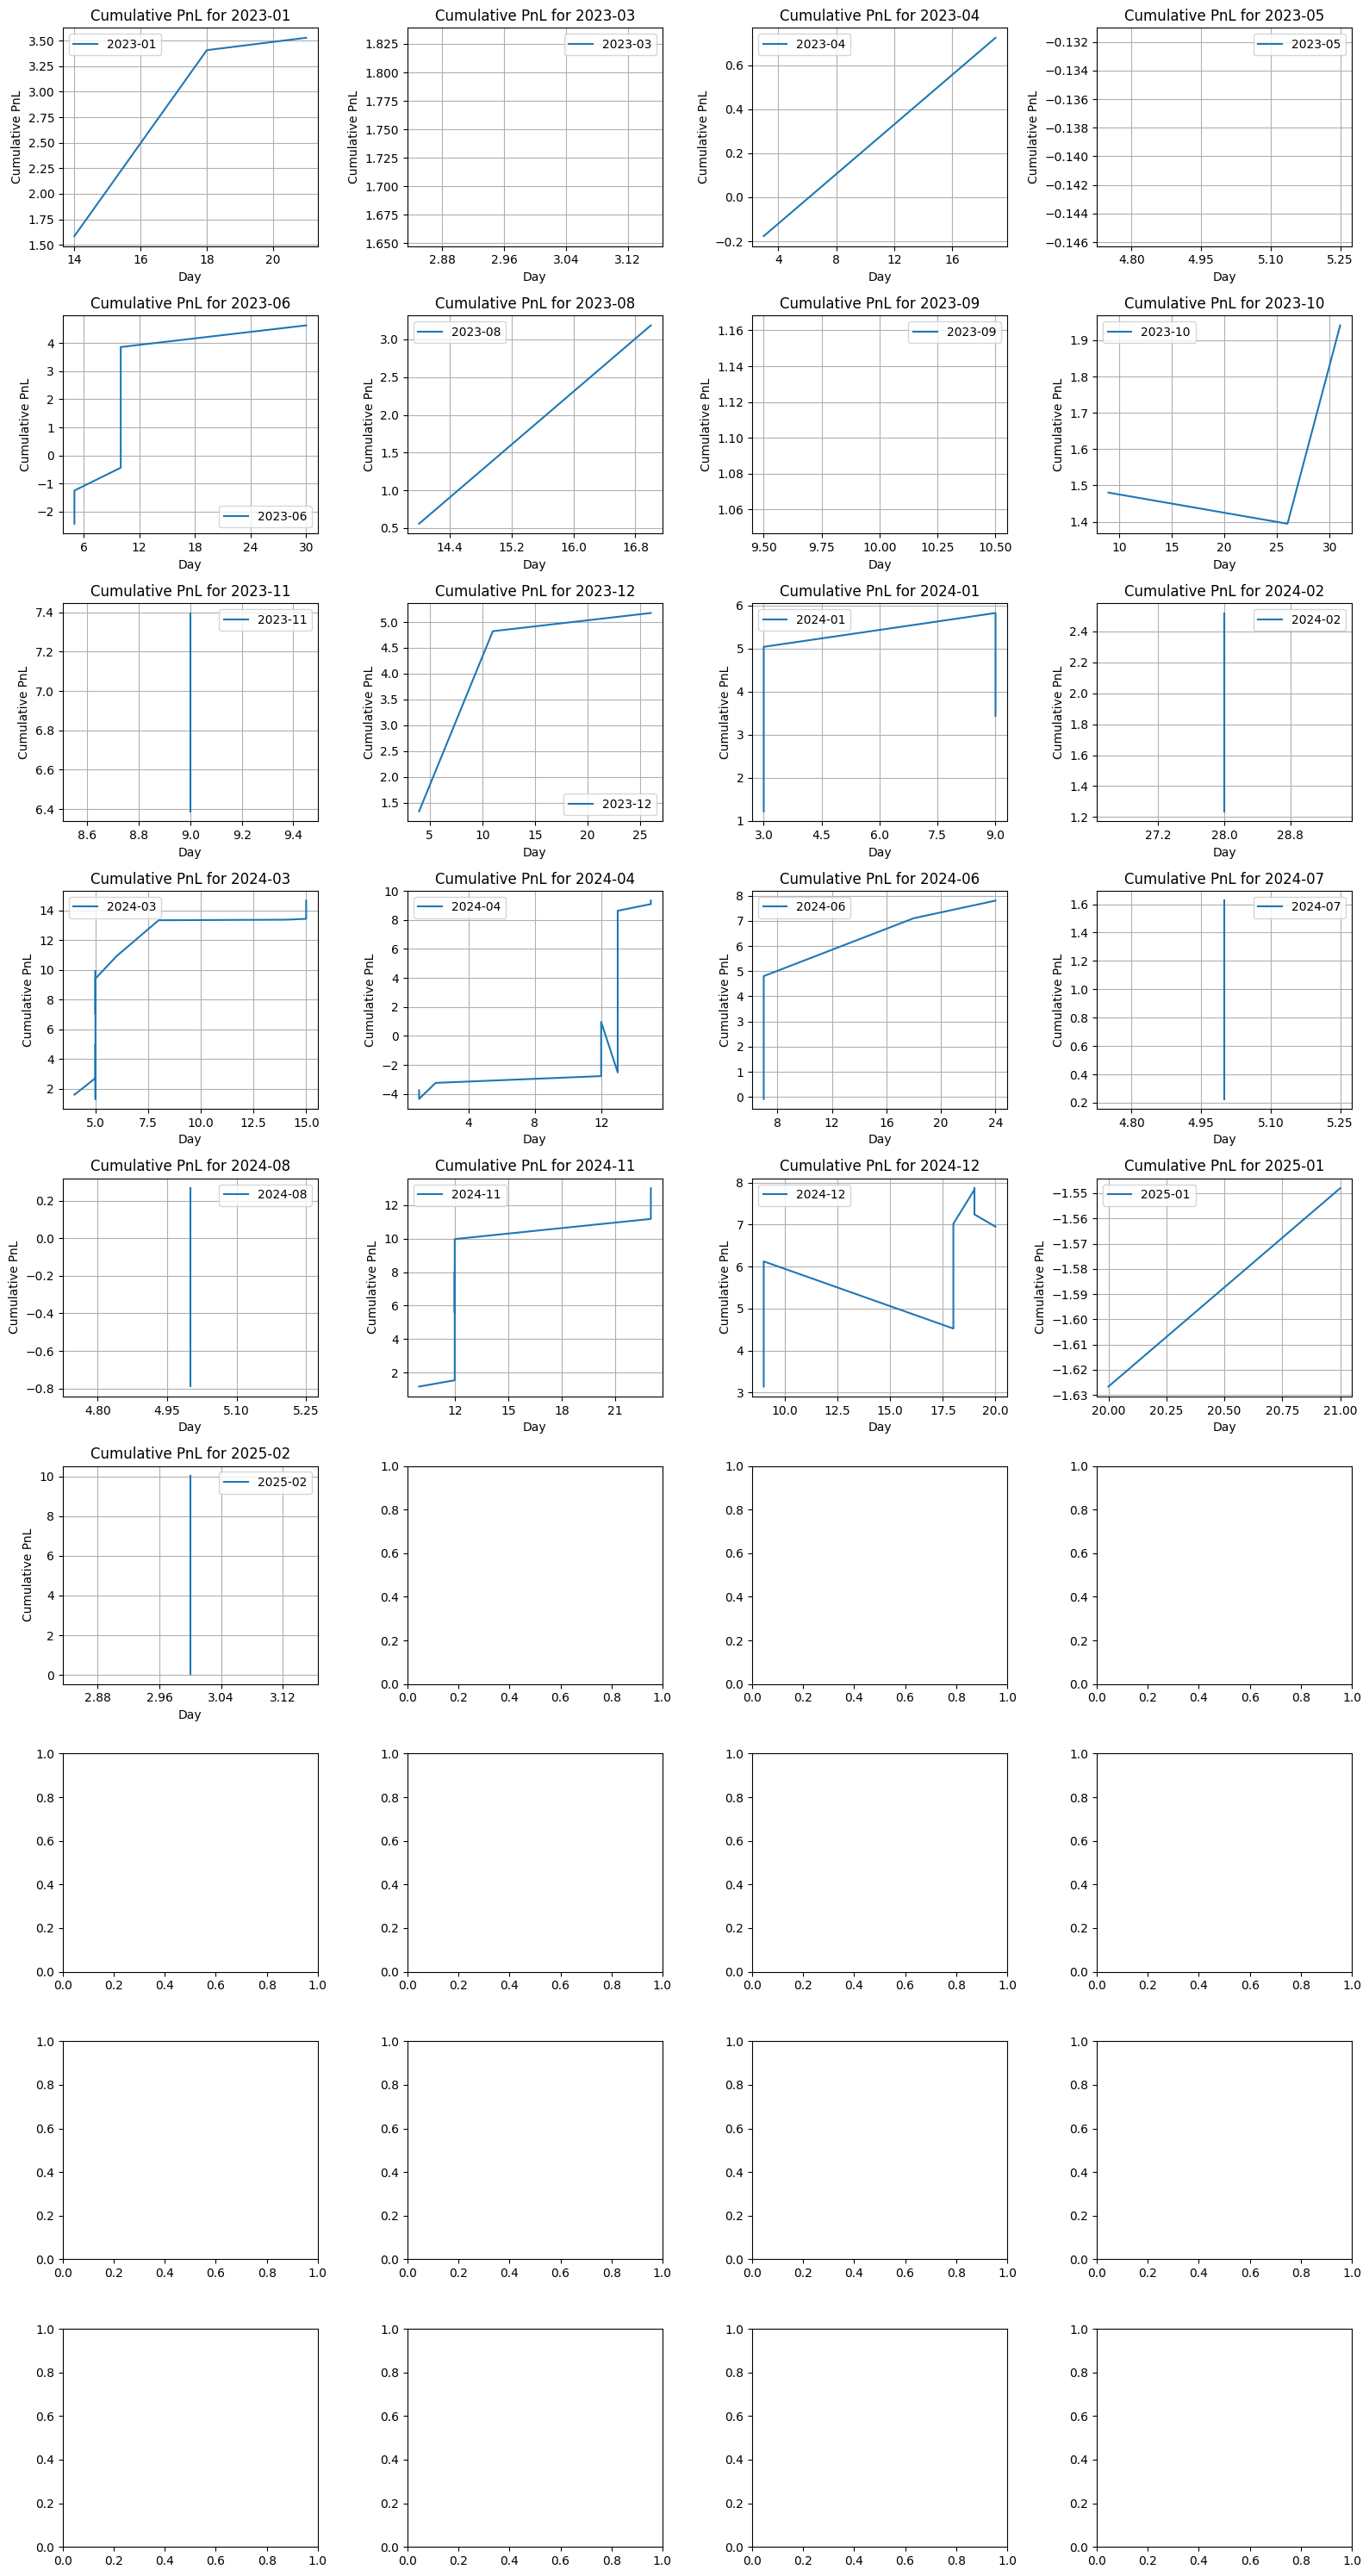

In [85]:
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Convert datetime column to Polars datetime type if not already
df_sum = df_sum.with_columns(pl.col("datetime").cast(pl.Datetime))

# Group by year and month
df_months = df_sum.group_by(["year", "month"], maintain_order=True)

# Get shape
n_year = len(years)

# Create subplots (3 rows, 4 columns)
fig, axes = plt.subplots(3*n_year, 4, figsize=(16, 10*n_year))
axes = axes.flatten()

# Loop through each group
for i, (year_month, df) in enumerate(df_months):
    year, month = year_month  # Unpack tuple (year, month)

    # Sort by datetime
    df = df.sort("datetime")

    # Compute cumulative PnL per month (starting from 0)
    df = df.with_columns(pl.col("pnl").cum_sum().alias("cum_pnl"))

    # Extract day (DD) for x-axis labels
    df = df.with_columns(df["datetime"].dt.day().alias("day"))

    # Plot
    ax = axes[i]
    ax.plot(df["day"].to_list(), df["cum_pnl"].to_list(), linestyle="-", label=f"{int(year)}-{int(month):02d}")
    ax.set_title(f"Cumulative PnL for {int(year)}-{int(month):02d}")
    ax.set_xlabel("Day")
    ax.set_ylabel("Cumulative PnL")
    ax.legend()
    ax.grid(True)

    # Reduce the number of x-axis labels
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))  # Show only 5 labels

# Adjust layout and show
plt.tight_layout()
plt.show()

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (6).

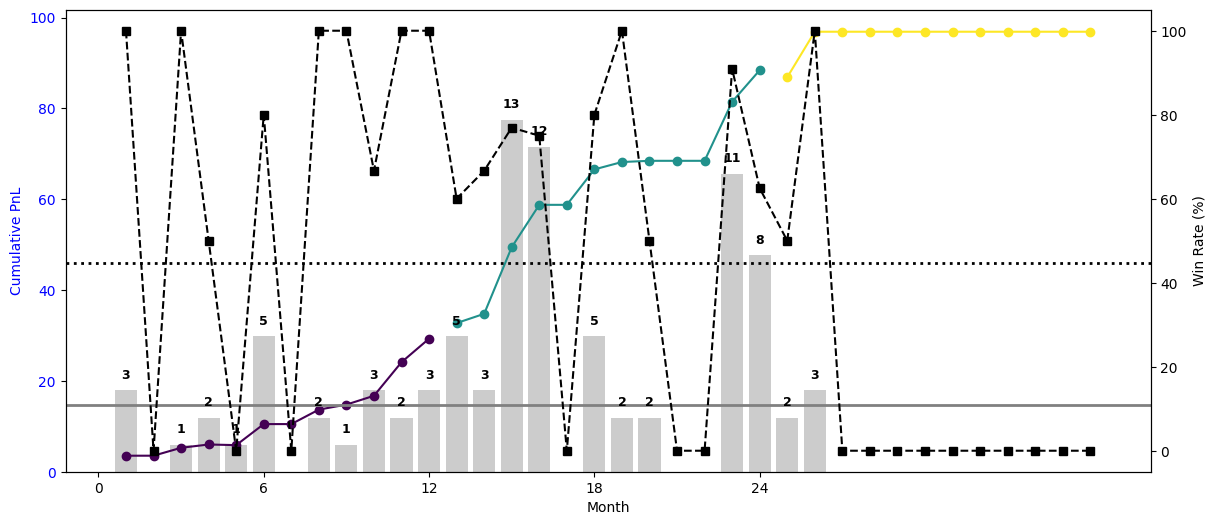

In [86]:
import matplotlib.pyplot as plt
import polars as pl
import numpy as np

# Convert year & month to integers and sort
df_monthly = df_monthly.with_columns(
    pl.col("year").cast(pl.Int32),
    pl.col("month").cast(pl.Int32)
).sort(["year", "month"])

# Get min/max year and month range
min_year, max_year = df_monthly["year"].min(), df_monthly["year"].max()
max_month = df_monthly.filter(pl.col("year") == max_year)["month"].max()

# Generate a complete date range (ensuring all months exist)
all_years = list(range(min_year, max_year + 1))
all_months = list(range(1, 13))
all_dates = [(y, m) for y in all_years for m in all_months]

# Create a full Polars DataFrame with all months present
df_full = pl.DataFrame({"year": [y for y, m in all_dates], "month": [m for y, m in all_dates]})

# Left join to ensure missing months are filled with 0
df_monthly = df_full.join(df_monthly, on=["year", "month"], how="left").fill_null(0)

# Compute global cumulative PnL (not resetting per year)
df_monthly = df_monthly.with_columns(
    pl.col("cum_pnl").cum_sum().alias("cumulative_pnl")
)

fig, ax1 = plt.subplots(figsize=(14, 6))

# Define colors for each year
year_colors = plt.cm.viridis(np.linspace(0, 1, max_year - min_year + 1))
year_color_map = {year: color for year, color in zip(range(min_year, max_year + 1), year_colors)}

# X-axis labels: Convert (year, month) into a continuous index
df_monthly = df_monthly.with_columns(
    ((pl.col("year") - min_year) * 12 + pl.col("month")).alias("x_index")
)

# Rescale action count to fit cumulative PnL range (increase scale factor)
max_cumulative_pnl = df_monthly["cumulative_pnl"].max()
max_action_count = df_monthly["action_count"].max()
scaled_action_count = (df_monthly["action_count"] / max_action_count) * max_cumulative_pnl * 0.8  # Increased scale factor

# Compute averages
avg_win_rate = df_monthly["win_rate"].mean()
avg_action_count_scaled = (df_monthly["action_count"].mean() / max_action_count) * max_cumulative_pnl * 0.8  # Rescaled

# Plot cumulative PnL with different colors per year
for year in range(min_year, max_year + 1):
    df_year = df_monthly.filter(pl.col("year") == year)
    ax1.plot(
        df_year["x_index"], df_year["cumulative_pnl"],
        marker="o", linestyle="-", color=year_color_map[year], label=f"{year} Cumulative PnL"
    )

# Bar plot for action count (rescaled to PnL range)
ax1.bar(df_monthly["x_index"], scaled_action_count, color="gray", alpha=0.4, label="Action Count (Rescaled)")

# Second y-axis: Win Rate (%)
ax2 = ax1.twinx()
ax2.plot(
    df_monthly["x_index"], df_monthly["win_rate"],
    marker="s", linestyle="dashed", color="black", label="Win Rate (%)"
)

# **Plot average lines**
ax2.axhline(avg_win_rate, color="black", linestyle="dotted", linewidth=2, label="Avg Win Rate (%)")
ax1.axhline(avg_action_count_scaled, color="gray", linestyle="solid", linewidth=2, label="Avg Action Count (Rescaled)")

# First y-axis labels (ONLY for Cumulative PnL)
ax1.set_xlabel("Month")
ax1.set_ylabel("Cumulative PnL", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Second y-axis labels (ONLY for Win Rate)
ax2.set_ylabel("Win Rate (%)", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Annotate action count directly on top of the rescaled bars
for i, (x, count, scaled) in enumerate(zip(df_monthly["x_index"], df_monthly["action_count"], scaled_action_count)):
    if count > 0:  # Avoid cluttering empty months
        ax1.text(x, scaled + (max_cumulative_pnl * 0.02), f"{count}",  # Offset slightly above bars
                 ha="center", va="bottom", fontsize=9, color="black", fontweight="bold")

# Set X-axis ticks: Label every 6 months
xtick_positions = np.arange(0, (max_year - min_year) * 12 + max_month, 6)
xtick_labels = [
    f"{m}/{y}" for y in range(min_year, max_year + 1) for m in [1, 7]
]
ax1.set_xticks(xtick_positions)
ax1.set_xticklabels(xtick_labels, rotation=45)

# Add legends
ax1.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.9))

fig.tight_layout()
plt.title("Cumulative PnL, Win Rate, and Monthly Action Count (Scaled Bars) with Averages")
plt.show()

In [ ]:
# # FOR ONE YEAR ONLY

# import matplotlib.pyplot as plt

# # Ensure the data is sorted by month
# df_monthly = df_monthly.sort("month")

# # Compute cumulative PnL correctly in Polars
# df_monthly = df_monthly.with_columns((df_monthly["cum_pnl"].cum_sum()).alias("cumulative_pnl"))

# fig, ax1 = plt.subplots(figsize=(10, 5))

# # First y-axis: Cumulative PnL and Win Rate
# ax1.set_xlabel("Month")
# ax1.set_ylabel("Cumulative PnL / Win Rate (%)", color="tab:blue")
# ax1.plot(df_monthly["month"], df_monthly["cumulative_pnl"], marker="o", color="tab:blue", label="Cumulative PnL")
# ax1.plot(df_monthly["month"], df_monthly["win_rate"], marker="s", linestyle="dashed", color="tab:green", label="Win Rate (%)")
# ax1.tick_params(axis="y", labelcolor="tab:blue")

# # Second y-axis: Monthly Action Count (as bar chart with labels)
# ax2 = ax1.twinx()
# ax2.set_ylabel("Monthly Action Count", color="tab:orange")
# bars = ax2.bar(df_monthly["month"], df_monthly["action_count"], alpha=0.5, color="tab:orange", label="Action Count")
# ax2.tick_params(axis="y", labelcolor="tab:orange")

# # Add text labels on top of each bar
# for bar, count in zip(bars, df_monthly["action_count"]):
#     ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{count}", 
#              ha="center", va="bottom", fontsize=10, color="black", fontweight="bold")

# # Add legends for clarity
# ax1.legend(loc="upper left")
# ax2.legend(loc="upper right")

# fig.tight_layout()
# plt.title("Cumulative PnL, Win Rate, and Monthly Action Count")
# plt.show()

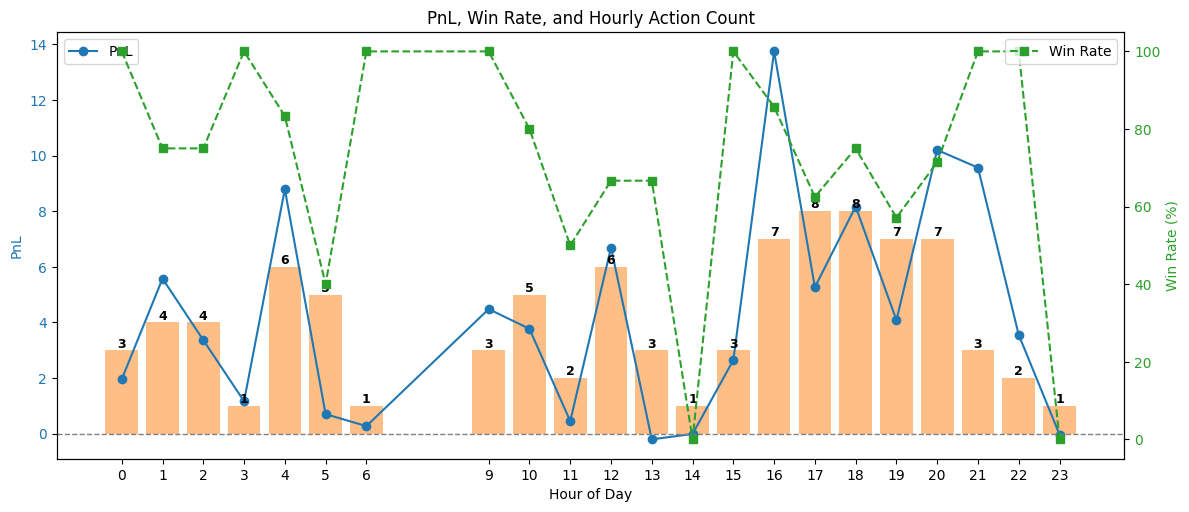

In [ ]:
import matplotlib.pyplot as plt

# Ensure the data is sorted by hour
df_hourly = df_hourly.sort("hour")

fig, ax1 = plt.subplots(figsize=(12, 5))

# First y-axis (left): PnL
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("PnL", color="tab:blue")
ax1.plot(df_hourly["hour"], df_hourly["cum_pnl"], marker="o", color="tab:blue", label="PnL")
ax1.axhline(0, linestyle="dashed", color="gray", linewidth=1)  # Add horizontal dashed line at PnL = 0
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Second y-axis (right): Win Rate
ax2 = ax1.twinx()
ax2.set_ylabel("Win Rate (%)", color="tab:green")
ax2.plot(df_hourly["hour"], df_hourly["win_rate"], marker="s", linestyle="dashed", color="tab:green", label="Win Rate")
ax2.tick_params(axis="y", labelcolor="tab:green")

# Action Count as Bars (without axis)
bars = ax1.bar(df_hourly["hour"], df_hourly["action_count"], alpha=0.5, color="tab:orange")

# Add text labels on top of each bar for action count
for bar, count in zip(bars, df_hourly["action_count"]):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{count}", 
             ha="center", va="bottom", fontsize=9, color="black", fontweight="bold")

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

fig.tight_layout()
plt.title("PnL, Win Rate, and Hourly Action Count")
plt.xticks(df_hourly["hour"])  # Ensure all hours are visible on x-axis
plt.show()

# Filtered Summary

In [262]:
df_sum_filtered = df_sum.filter(~pl.col("hour").is_in([24]))

# Calculate metrics
total_pnl = df_sum_filtered["pnl"].sum()
total_long = len(df_sum_filtered)
total_wins = df_sum_filtered.filter((pl.col("pnl") >= 0)).height
win_rate = (total_wins / total_long) * 100 if total_long > 0 else 0

print(f"Long Opened: {total_long}")
print(f"Win Rate: {win_rate:.2f} %")
print(f"Total PnL: {total_pnl:.2f} %")

Long Opened: 103
Win Rate: 73.79 %
Total PnL: 93.70 %


In [85]:
import polars as pl

# Group by year and month, then aggregate
df_monthly_filtered = df_sum_filtered.group_by(['year', 'month']).agg([
    pl.col('action').count().alias('action_count'),
    pl.col('pnl').sum().alias('cum_pnl'),
    pl.col('win').sum().alias('sum_win'),
])

df_monthly_filtered = df_monthly_filtered.with_columns(
        ((pl.col("sum_win") / pl.col("action_count")) * 100).alias("win_rate")
    )

# Display the result
df_monthly_filtered

year,month,action_count,cum_pnl,sum_win,win_rate
f64,f64,u32,f64,i32,f64
2020.0,12.0,272,-9.708522,130,47.794118
2023.0,8.0,12,1.499909,5,41.666667
2020.0,11.0,57,-1.658469,32,56.140351
2024.0,12.0,34,15.929285,20,58.823529
2022.0,12.0,1,-0.564756,0,0.0
…,…,…,…,…,…
2024.0,1.0,9,-9.244837,2,22.222222
2023.0,12.0,3,5.743004,3,100.0
2020.0,9.0,3,3.836344,3,100.0


In [86]:
import polars as pl

# Group by year and month, then aggregate
df_hourly_filtered = df_sum_filtered.group_by(['hour']).agg([
    pl.col('action').count().alias('action_count'),
    pl.col('pnl').sum().alias('cum_pnl'),
    pl.col('win').sum().alias('sum_win'),
])

df_hourly_filtered = df_hourly_filtered.with_columns(
        ((pl.col("sum_win") / pl.col("action_count")) * 100).alias("win_rate")
    )

# Display the result
df_hourly_filtered

hour,action_count,cum_pnl,sum_win,win_rate
f64,u32,f64,i32,f64
0.0,72,-1.984137,33,45.833333
22.0,68,2.166062,35,51.470588
3.0,41,33.134539,23,56.097561
9.0,41,1.132157,25,60.97561
12.0,73,2.41624,37,50.684932
…,…,…,…,…
10.0,48,28.310651,28,58.333333
4.0,29,14.218691,17,58.62069
16.0,129,0.921463,68,52.713178


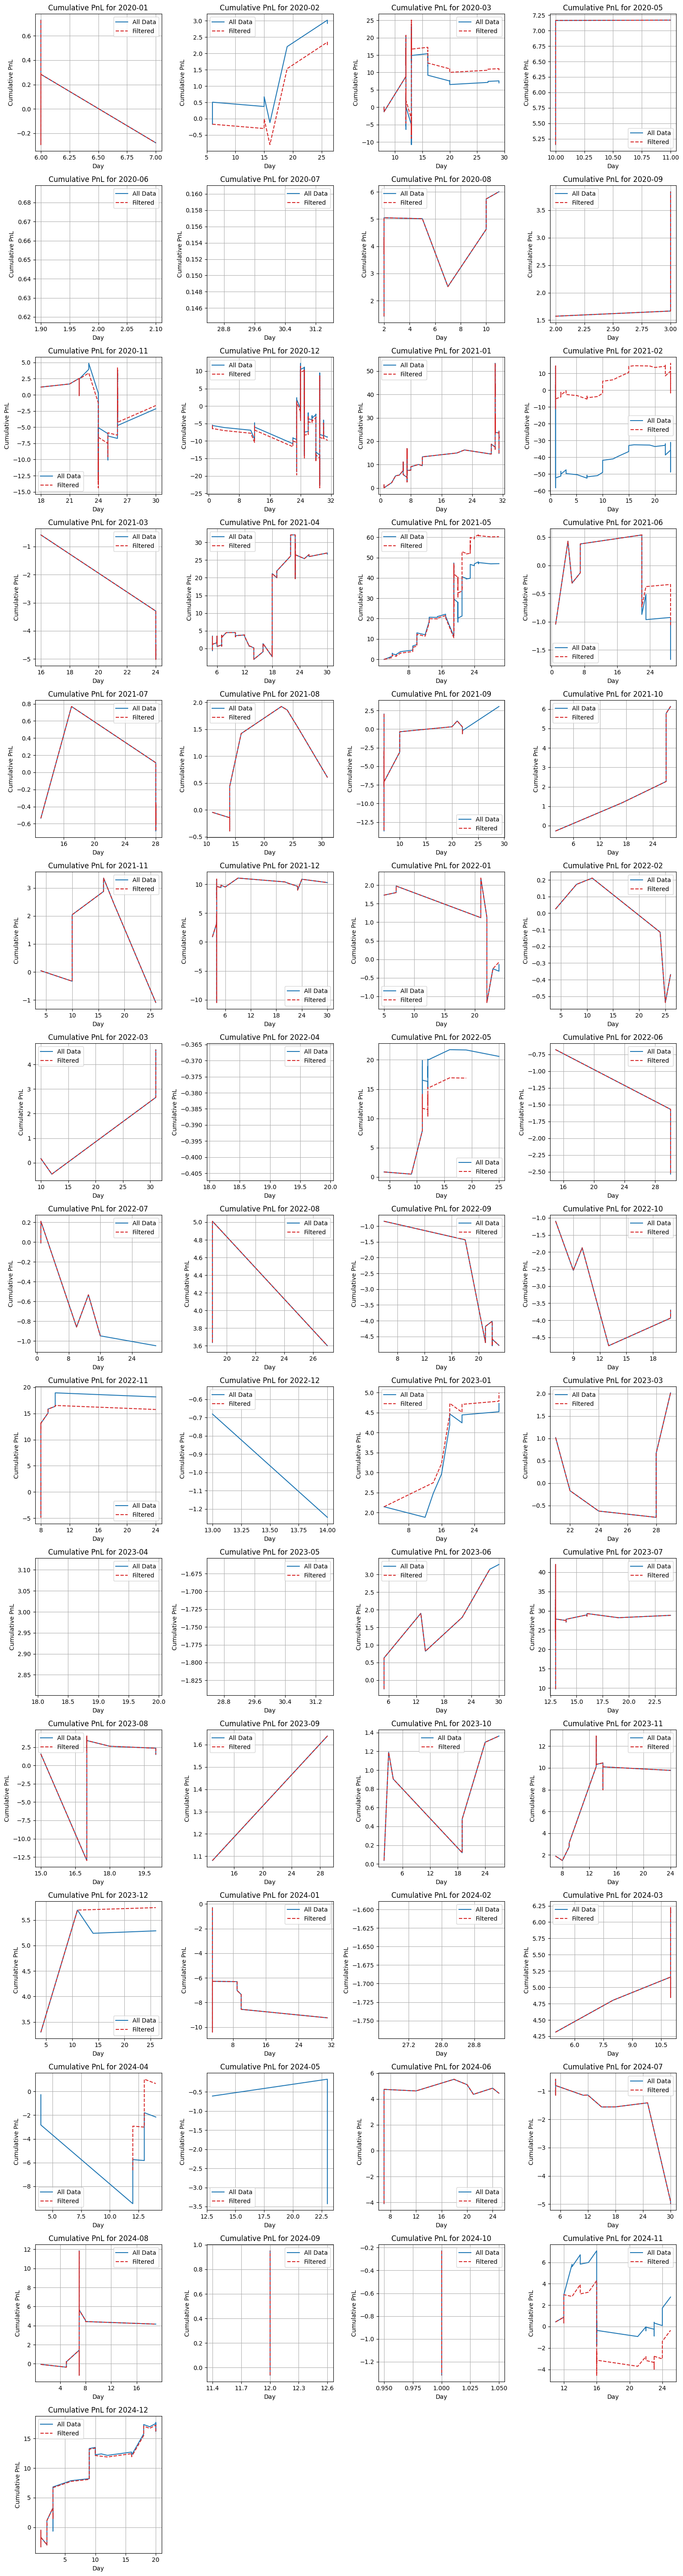

In [87]:
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Convert datetime column to Polars datetime type if not already
df_sum = df_sum.with_columns(pl.col("datetime").cast(pl.Datetime))
df_sum_filtered = df_sum_filtered.with_columns(pl.col("datetime").cast(pl.Datetime))

# Group by year and month
df_months = df_sum.group_by(["year", "month"], maintain_order=True)
df_months_filtered = df_sum_filtered.group_by(["year", "month"], maintain_order=True)

# Get unique (year, month) combinations
unique_year_months = df_sum.select(["year", "month"]).unique().to_numpy().tolist()
num_plots = len(unique_year_months)

# Determine subplot grid layout
rows = (num_plots // 4) + (num_plots % 4 > 0)  # 4 columns per row
fig, axes = plt.subplots(rows, 4, figsize=(16, 4 * rows))
axes = axes.flatten()

# Loop through each year-month group and plot both datasets
for i, ((year_month, df), (_, df_filtered)) in enumerate(zip(df_months, df_months_filtered)):
    year, month = year_month  # Unpack tuple (year, month)

    # Sort by datetime
    df = df.sort("datetime")
    df_filtered = df_filtered.sort("datetime")

    # Compute cumulative PnL per month (starting from 0)
    df = df.with_columns(pl.col("pnl").cum_sum().alias("cum_pnl"))
    df_filtered = df_filtered.with_columns(pl.col("pnl").cum_sum().alias("cum_pnl"))

    # Extract day (DD) for x-axis labels
    df = df.with_columns(df["datetime"].dt.day().alias("day"))
    df_filtered = df_filtered.with_columns(df_filtered["datetime"].dt.day().alias("day"))

    # Plot
    ax = axes[i]
    ax.plot(df["day"].to_list(), df["cum_pnl"].to_list(), linestyle="-", color="tab:blue", label="All Data")
    ax.plot(df_filtered["day"].to_list(), df_filtered["cum_pnl"].to_list(), linestyle="dashed", color="tab:red", label="Filtered")

    ax.set_title(f"Cumulative PnL for {int(year)}-{int(month):02d}")
    ax.set_xlabel("Day")
    ax.set_ylabel("Cumulative PnL")
    ax.legend()
    ax.grid(True)

    # Reduce the number of x-axis labels
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))  # Show only 5 labels

# Remove unused subplots if there are fewer than 4*rows
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show
plt.tight_layout()
plt.show()

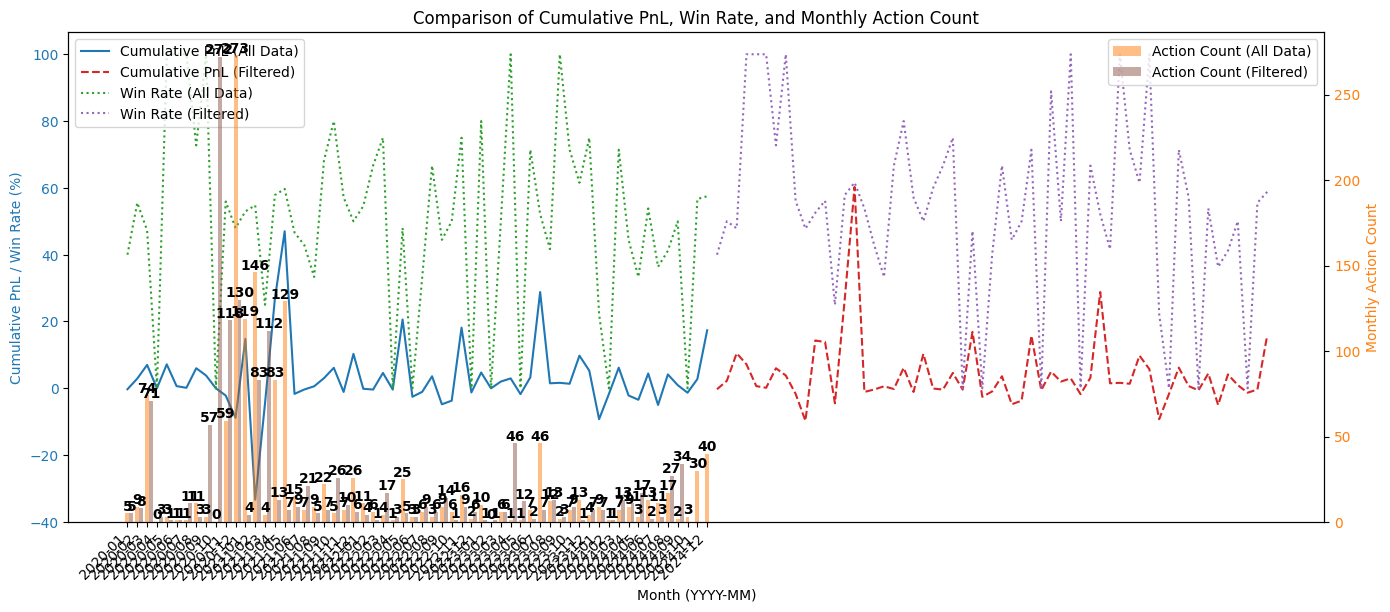

In [88]:
import matplotlib.pyplot as plt

# Ensure both datasets are sorted by year and month
df_monthly = df_monthly.sort(["year", "month"])
df_monthly_filtered = df_monthly_filtered.sort(["year", "month"])

# Create a formatted column for x-axis labels (YYYY-MM)
df_monthly = df_monthly.with_columns((pl.col("year").cast(pl.Utf8) + "-" + pl.col("month").cast(pl.Utf8).str.zfill(2)).alias("year_month"))
df_monthly_filtered = df_monthly_filtered.with_columns((pl.col("year").cast(pl.Utf8) + "-" + pl.col("month").cast(pl.Utf8).str.zfill(2)).alias("year_month"))

fig, ax1 = plt.subplots(figsize=(14, 6))

# First y-axis: Cumulative PnL and Win Rate
ax1.set_xlabel("Month (YYYY-MM)")
ax1.set_ylabel("Cumulative PnL / Win Rate (%)", color="tab:blue")

# Cumulative PnL comparison
ax1.plot(df_monthly["year_month"], df_monthly["cum_pnl"], linestyle="-", color="tab:blue", label="Cumulative PnL (All Data)")
ax1.plot(df_monthly_filtered["year_month"], df_monthly_filtered["cum_pnl"], linestyle="dashed", color="tab:red", label="Cumulative PnL (Filtered)")

# Win Rate comparison
ax1.plot(df_monthly["year_month"], df_monthly["win_rate"], linestyle="dotted", color="tab:green", label="Win Rate (All Data)")
ax1.plot(df_monthly_filtered["year_month"], df_monthly_filtered["win_rate"], linestyle="dotted", color="tab:purple", label="Win Rate (Filtered)")

ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.set_xticks(range(len(df_monthly["year_month"])))  # Set correct ticks
ax1.set_xticklabels(df_monthly["year_month"], rotation=45, ha="right")  # Format x-axis labels

# Second y-axis: Monthly Action Count
ax2 = ax1.twinx()
ax2.set_ylabel("Monthly Action Count", color="tab:orange")

# Bar chart comparison for action count
bar_width = 0.4  # Adjust for spacing
bars1 = ax2.bar(range(len(df_monthly["year_month"])), df_monthly["action_count"], width=bar_width, alpha=0.5, color="tab:orange", label="Action Count (All Data)")
bars2 = ax2.bar([x + bar_width for x in range(len(df_monthly_filtered["year_month"]))], df_monthly_filtered["action_count"], width=bar_width, alpha=0.5, color="tab:brown", label="Action Count (Filtered)")

ax2.tick_params(axis="y", labelcolor="tab:orange")

# Add text labels on top of bars for action counts
for bar, count in zip(bars1, df_monthly["action_count"]):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{count}", 
             ha="center", va="bottom", fontsize=10, color="black", fontweight="bold")

for bar, count in zip(bars2, df_monthly_filtered["action_count"]):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{count}", 
             ha="center", va="bottom", fontsize=10, color="black", fontweight="bold")

# Add legends for clarity
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

fig.tight_layout()
plt.title("Comparison of Cumulative PnL, Win Rate, and Monthly Action Count")
plt.show()